In [1]:
dataset_name_mapping = {
    'cola': 'CoLA',
    'sst-2': 'SST-2',
    'qqp': 'QQP',
    'mrpc': 'MRPC',
    'mnli': 'MNLI-m',
    'mnli-mm': 'MNLI-mm',
    'qnli': 'QNLI',
    'rte': 'RTE',
    'wnli': 'WNLI',
    'stsb' : 'STS-B',
    'ax' : 'AX'
}

In [2]:
import pickle
import numpy as np

def sum_text(texts1, texts2, sep_token):
    full_text = np.array(texts1,dtype=object) + np.array([sep_token for _ in range(len(texts1))])+np.array(texts2,dtype=object)

    return list(full_text)

datasets = {}
data_names = ['sst-2', 'mrpc',]
# data_names = ['qqp', 'cola','sst-2', 'mrpc', 'wnli', 'qnli', 'rte', 'mnli', 'mnli-mm']
for data_name in data_names:
    location = f'/workspace/task_dataset/{data_name}_dataset.pkl'
    with open(location, 'rb') as f:
        datasets[data_name] = pickle.load(f)


sentences_data = datasets['sst-2']['train'][:20]

# line_text_encoding = sum_text(sentences_data['premise'],sentences_data['hypothesis'],tokenizer.sep_token)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = 'sst-2'
with open(f'/workspace/cache_index/{dataset}_seed_13_indexes.pkl', 'rb') as f:
    dataset_index = pickle.load(f)
sentences_data = datasets[dataset]['train'][dataset_index]

In [4]:
sentences_data['sentence']

['cell phones , guns , and the internal combustion engine ',
 'could fail to respond ',
 'know why steven seagal is considered a star , nor why he keeps being cast in action films when none of them are ever any good ',
 'seeking anyone with acting ambition but no sense of pride or shame ',
 'clean-cut dahmer ( jeremy renner ) and fiendish acts that no amount of earnest textbook psychologizing can bridge . ',
 'just another voyeuristic spectacle ',
 'pomposity ',
 "it 's hard to say who might enjoy this ",
 'sci-fi drama that takes itself all too seriously . ',
 'proves tiresome , with the surface histrionics failing to compensate for the paper-thin characterizations and facile situations . ',
 'liar ',
 'low-budget and tired ',
 'sad to say ',
 'fizzability ',
 'positively dreadful ',
 'complete with loads of cgi and bushels of violence , but not a drop ',
 'but something far more stylish and cerebral ',
 'the multi-layers ',
 'is an interesting story of pointed personalities , courage

In [5]:
with open('/workspace/dataset/roberta-large_embeddings.pkl', 'rb') as f:
    embedding_space = pickle.load(f)
embedding_space

tensor([[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
        [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
        [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
        ...,
        [ 0.0393,  0.0031,  0.0465,  ..., -0.0240, -0.0505,  0.0342],
        [ 0.0499,  0.0272,  0.0413,  ..., -0.0370, -0.0100,  0.0071],
        [-0.0149, -0.0114, -0.0222,  ...,  0.0441,  0.0116, -0.0330]],
       requires_grad=True)

In [6]:
embedding_space.shape

torch.Size([50265, 1024])

In [8]:
with open('/workspace/model_file/roberta-large_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
tokenizer

RobertaTokenizer(name_or_path='roberta-large', vocab_size=50265, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [9]:
line_text_encoding = sentences_data['sentence']
inputs = tokenizer(line_text_encoding, 
                    add_special_tokens=True, 
                    padding= 'max_length',  # 'max_length'
                    max_length= 128,  # args.max_seq_length
                    truncation=True,
                    return_attention_mask=True, 
                    return_tensors='pt')

In [11]:
inputs['input_ids']

{'input_ids': tensor([[    0,  7841,  4247,  ...,     1,     1,     1],
        [    0, 17304,  5998,  ...,     1,     1,     1],
        [    0, 27066,   596,  ...,     1,     1,     1],
        ...,
        [    0,  6025,   939,  ...,     1,     1,     1],
        [    0,   354,    63,  ...,     1,     1,     1],
        [    0,   463,    37,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [10]:
inputs['input_ids'].shape

torch.Size([32, 128])

In [13]:
embedding_space

tensor([[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
        [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
        [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
        ...,
        [ 0.0393,  0.0031,  0.0465,  ..., -0.0240, -0.0505,  0.0342],
        [ 0.0499,  0.0272,  0.0413,  ..., -0.0370, -0.0100,  0.0071],
        [-0.0149, -0.0114, -0.0222,  ...,  0.0441,  0.0116, -0.0330]],
       requires_grad=True)

In [19]:
inputs['input_ids'][0]

tensor([    0,  7841,  4247,  2156,  5013,  2156,     8,     5,  3425, 31620,
         3819,  1437,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1])

In [21]:
import torch
embedding_space[torch.tensor(7841)]

tensor([-0.1183, -0.0938, -0.0157,  ...,  0.0315,  0.0627, -0.1250],
       grad_fn=<SelectBackward0>)

In [15]:
outputs1 = embedding_space[inputs['input_ids']]
outputs1

tensor([[[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [-0.1183, -0.0938, -0.0157,  ...,  0.0315,  0.0627, -0.1250],
         [-0.3091, -0.0316, -0.1074,  ..., -0.1575,  0.0787, -0.1840],
         ...,
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156]],

        [[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [-0.0773, -0.0558, -0.0635,  ...,  0.1324,  0.1899, -0.1246],
         [-0.0661, -0.0145, -0.0757,  ..., -0.0765,  0.0540, -0.1250],
         ...,
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156]],

        [[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [ 0.0578, -0.0619, -0.1251,  ...,  0

In [32]:
outputs1.shape

torch.Size([32, 128, 1024])

In [ ]:
sentences_data = datasets['mnli']['train'][:20]
input_token = []
outputs = []
inputs = tokenizer(sentences_data, 
                    add_special_tokens=True, 
                    padding= 'max_length',  # 'max_length'
                    max_length= 128,  # args.max_seq_length
                    truncation=True,
                    return_attention_mask=True, 
                    return_tensors='pt')

with torch.no_grad():
    for i in range(len(sentences_data)):
        temp = model.roberta.embeddings.word_embeddings(inputs['input_ids'][i])
        input_token.append(inputs['input_ids'][0])
        outputs.append(temp)
len(outputs)

# Interpretation Embedding Datasets

In [226]:
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

with open('/workspace/model_file/roberta-large_class_2.pkl', 'rb') as f:
    model = pickle.load(f)
with open('/workspace/model_file/roberta-large_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('/workspace/cache_VQ_model_ver2/roberta-large_5e-05_4096.pkl', 'rb') as f:
    vq_model_5e05_4096 = pickle.load(f).to('cuda')    
with open('/workspace/cache_VQ_model_ver2/roberta-large_5e-05_2048.pkl', 'rb') as f:
    vq_model_5e05_2048 = pickle.load(f).to('cuda')    
with open('/workspace/cache_VQ_model_ver2/roberta-large_5e-05_1024.pkl', 'rb') as f:
    vq_model_5e05_1024 = pickle.load(f).to('cuda')    


with open('/workspace/dataset/roberta-large_embeddings.pkl', 'rb') as f:
    embedding_space = pickle.load(f)
with open('/workspace/dataset/bert-large_embeddings.pkl', 'rb') as f:
    bert_embedding_space = pickle.load(f)

In [228]:
bert_embedding_space.shape

torch.Size([30522, 1024])

: 

In [256]:
# def get_embedding_to_token(embeddings, word_embedding):
#     embeddings = embeddings.detach()
#     word_embedding = word_embedding.detach()

#     similarity = cosine_similarity(embeddings, word_embedding)
#     return torch.argmax(torch.tensor(similarity)).item()


In [25]:
seeds = [13,21,42,87,100]
sst2_index = {}
for seed in seeds:
    with open(f'/workspace/cache_index/sst-2_seed_{seed}_indexes.pkl', 'rb') as f:
        sst2_index[f'seed_{seed}'] = pickle.load(f)


In [26]:
print(sst2_index['seed_13'])

[24343, 19288, 24559, 28037, 3928, 56568, 1891, 34399, 59122, 33647, 30674, 63803, 45348, 58769, 57721, 58117, 33948, 38110, 30219, 29512, 17067, 9283, 38621, 16553, 36154, 19229, 11134, 57247, 18285, 46627, 56305, 47736]


In [27]:
print(sst2_index['seed_42'])

[29256, 66237, 26062, 58878, 851, 28221, 12156, 49797, 5695, 49615, 9116, 6006, 29871, 10458, 36434, 59429, 14592, 3278, 36048, 32098, 18289, 13434, 11395, 55302, 4165, 3905, 12280, 28657, 30495, 3478, 54987, 28893]


In [28]:
print(sst2_index['seed_100'])

[60231, 56821, 66435, 15900, 10505, 59761, 34526, 26802, 43955, 40554, 24719, 45482, 48504, 52830, 60438, 36146, 19093, 59628, 22904, 51515, 45840, 14413, 6276, 30107, 26721, 23391, 18459, 53699, 27634, 739, 51841, 19346]


In [29]:
embeddings.shape

torch.Size([50265, 1024])

In [30]:
for index, token in zip(token_indices, specific_tokens):
    plt.annotate(token, (reduced_embeddings[index, 0], reduced_embeddings[index, 1]))

NameError: name 'token_indices' is not defined

In [ ]:
# Function to convert embedding to token

def get_embedding_to_token_cosine(embeddings, outputs, sentences_data):
    for i in range(len(outputs)):
        word_embedding = outputs[i].detach()
        print(sentences_data[i])
        similarity = cosine_similarity(embeddings, word_embedding)
        for i in range(similarity.shape[1]):
            print(tokenizer.decode(similarity[:,i].argmax()), end = ' ')
        print('\n')


# Function to convert embedding to token

def get_embedding_to_token_euclidean(embeddings, outputs, sentences_data):
    for i in range(len(outputs)):
        word_embedding = outputs[i].detach()
        print(sentences_data[i])
        similarity = euclidean_distances(embeddings, word_embedding)
        for i in range(similarity.shape[1]):
            print(tokenizer.decode(similarity[:,i].argmin()), end = ' ')
        print('\n')

In [129]:
import pickle
import numpy as np

def sum_text(texts1, texts2, sep_token):
    full_text = np.array(texts1,dtype=object) + np.array([sep_token for _ in range(len(texts1))])+np.array(texts2,dtype=object)

    return list(full_text)

datasets = {}
data_names = ['qqp', 'cola','sst-2', 'mrpc', 'wnli', 'qnli', 'rte', 'mnli', 'mnli-mm']
for data_name in data_names:
    location = f'/workspace/task_dataset/{data_name}_dataset.pkl'
    with open(location, 'rb') as f:
        datasets[data_name] = pickle.load(f)

# # mnli dataset
# sentences_data = datasets['mnli']['train'][:20]
# line_text_encoding = sum_text(sentences_data['premise'],sentences_data['hypothesis'],tokenizer.sep_token)


sentences_data = datasets['sst-2']['train'][sst2_index['seed_42']]
line_text = sentences_data['sentence']


# # Set the datasets
embedding_space = embedding_space.detach()

input_token = []
outputs = []
inputs = tokenizer(line_text, 
                    add_special_tokens=True, 
                    padding= True ,#'max_length',  # 'max_length'
                    # max_length= 128,  # args.max_seq_length
                    truncation=True,
                    return_attention_mask=True, 
                    return_tensors='pt')

outputs = embedding_space[inputs['input_ids']]

# with torch.no_grad():
# for i in range(len(line_text_encoding)):
#     temp = embedding_space[inputs['input_ids'][i]]
#     input_token.append(inputs['input_ids'][0])
#     outputs.append(temp)


In [45]:
# real sentence 분석
get_embedding_to_token_euclidean(embedding_space, outputs, line_text)

nothing special and , until the final act , nothing 
<s> nothing  special  and ,  until  the  final  act ,  nothing   </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

stereotypical familial quandaries 
<s> st ere otyp ical  familial  qu and aries   </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

In [46]:
# real sentence 분석
get_embedding_to_token_cosine(embedding_space, outputs, line_text)

nothing special and , until the final act , nothing 
<s> nothing  special  and ,  until  the  final  act ,  nothing   </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

stereotypical familial quandaries 
<s> st ere otyp ical  familial  qu and aries   </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

In [152]:
vq_input = outputs
print(len(vq_input))
print(vq_input[0].shape)
# vq_input_ = [torch.tensor(i) for i in vq_input]


augmented_data_4096 = []
total_augmented_data_4096 = []

# 4096
vq_model_5e05_4096.eval()
for embs in vq_input:
    embs = embs.to(device = 'cuda:0')
    decoded_sentence = []
    for j in range(embs.shape[0]):
        text = embs[j,:].view(1,-1)
        # label = label.view(-1)
        decoded_text_4096 = vq_model_5e05_4096(text)[0]
        decoded_sentence.append(decoded_text_4096)

    augmented_data_4096 = torch.cat(decoded_sentence, dim=0)
    total_augmented_data_4096.append(augmented_data_4096)

total_augmented_data_4096 = torch.stack(total_augmented_data_4096, dim=0).to(device = 'cpu')
attention_mask = inputs['attention_mask']


# 2048

augmented_data_2048 = []
total_augmented_data_2048 = []

vq_model_5e05_2048.eval()
for embs in vq_input:
    embs = embs.to(device = 'cuda:0')
    decoded_sentence = []
    for j in range(embs.shape[0]):
        text = embs[j,:].view(1,-1)
        # label = label.view(-1)
        decoded_text_2048 = vq_model_5e05_2048(text)[0]
        decoded_sentence.append(decoded_text_2048)

    augmented_data_2048 = torch.cat(decoded_sentence, dim=0)
    total_augmented_data_2048.append(augmented_data_2048)

total_augmented_data_2048 = torch.stack(total_augmented_data_2048, dim=0).to(device = 'cpu')
attention_mask = inputs['attention_mask']


# 1024

augmented_data_1024 = []
total_augmented_data_1024 = []

vq_model_5e05_1024.eval()
for embs in vq_input:
    embs = embs.to(device = 'cuda:0')
    decoded_sentence = []
    for j in range(embs.shape[0]):
        text = embs[j,:].view(1,-1)
        # label = label.view(-1)
        decoded_text_1024 = vq_model_5e05_1024(text)[0]
        decoded_sentence.append(decoded_text_1024)

    augmented_data_1024 = torch.cat(decoded_sentence, dim=0)
    total_augmented_data_1024.append(augmented_data_1024)

total_augmented_data_1024 = torch.stack(total_augmented_data_1024, dim=0).to(device = 'cpu')
attention_mask = inputs['attention_mask']

32
torch.Size([35, 1024])


In [55]:
# Function to convert embedding to token

def get_embedding_to_token_cosine_vq(embeddings, outputs, vq_outputs, sentences_data):
    rate = 0.2
    for i in range(len(outputs)):
        word_embedding_real = outputs[i].detach()
        word_embedding_fake = vq_outputs[i].detach()
        print(sentences_data[i])
        similarity_real = cosine_similarity(embeddings, word_embedding_real)
        similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
        for j in range(similarity_real.shape[1]):
            print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , '] fake[', tokenizer.decode(similarity_fake[:,j].argmax()),']')
            print()
        print('\n')

In [56]:
# Function to convert embedding to token

def get_embedding_to_token_euclidean_vq(embeddings, outputs, vq_outputs, sentences_data):
    rate = 0.2
    for i in range(len(outputs)):
        word_embedding_real = outputs[i].detach()
        word_embedding_fake = vq_outputs[i].detach()
        print(sentences_data[i])
        similarity_real = euclidean_distances(embeddings, word_embedding_real)
        similarity_fake = euclidean_distances(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
        for j in range(similarity_real.shape[1]):
            print('real[',tokenizer.decode(similarity_real[:,j].argmin()) , '] fake[', tokenizer.decode(similarity_fake[:,j].argmin()),']')
            print()
        print('\n')

### codebook_num_4096

In [145]:
rate = 0.0
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_4096[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data_4096[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ ─ ```` ;;;; ���� § ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ ─ ```` ;;;; ���� § ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  esoteric  clandestine  subversive  adolescent  nefarious ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  impoverished  obsolete  obscured  afflicted  banished ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [  impoverished  obsolete  obscured  afflicted  banished ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  impoverished  obsolete  obscured  afflicted  banished ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  Context  Flake  Cisco  Apex  Terra ]

real[  final ]
real simi

In [147]:
rate = 0.2
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_4096[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s> ─ ;;;; ```` …………………… ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing § Nothing ─ ;;;; ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  esoteric  clandestine  exquisite  subversive  nefarious ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  and ,  impoverished  obsolete  obscured ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ ,  ; ,  obsolete  impoverished ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [ ,  Until  impoverished  until  banished ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  Apex  Cisco  Flake  Terra  Chevron ]

real[  final ]
real similar top 5 [  final  Final final Final  FIN

In [148]:
rate = 0.4
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_4096[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)


nothing special and , until the final act , nothing 


real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s> <mask> </s> . ;;;; ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing Nothing anything everything  nothing ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  special  Special  esoteric  exquisite  clandestine ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  and ,  the  but . ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ , ,  ;  ), . ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  until  Until until  till Until ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  the  The  Apex  Cisco  Terra ]

real[  final ]
real similar top 5 [  final  Final final Final  FINAL ]
fake similar top 5 [  final  concluding  Final  pivotal  poignant ]

real[  act ]
real si

### codebook_num 2048

In [149]:
rate = 0.0
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_2048[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 


real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ agnar aleb htt jamin erek ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ agnar aleb htt jamin erek ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  exquisite  extravagant  ludicrous  astounding  outlandish ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  exquisite  extravagant  ludicrous  astounding  outlandish ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [  Rapt  Retro  Psych  Unic  Mult ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  exquisite  extravagant  ludicrous  astounding  outlandish ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  Rapt  Retro  Psych  Unic  Mult ]

real[  final ]
real similar top 5 [  final  Final final Final  FINAL ]
fake simil

In [150]:
rate = 0.2
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_2048[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ htt aleb jamin agnar becca ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing becca aleb htt fff ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  exquisite  extravagant  astounding  intricate  outlandish ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  exquisite  extravagant  astounding  astonishing  ludicrous ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [  Retro  Psych  Plastic  Rapt  Heroic ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  exquisite  astounding  extravagant  astonishing  ludicrous ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  The  the  Retro  Rapt  Psych ]

real[  final ]
real s

In [151]:
rate = 0.4
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_2048[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)


nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s> htt becca aleb retty ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing Nothing anything little none ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  special  exquisite  peculiar  extravagant  unconventional ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  and  exquisite  extravagant  astounding  astonishing ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ , . ,  ;  The ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  until until  astounding  exquisite  excruciating ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  the  The  a  Retro </s> ]

real[  final ]
real similar top 5 [  final  Final final F

In [153]:
rate = 0.0
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_1024[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)




nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [  Proced  Profession  ----------------  Config Struct ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [  Proced  Profession  ----------------  Config Struct ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  demonic  anarchist  superhero  subversive  mystic ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  demonic  anarchist  superhero  subversive  mystic ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ 311 326 317 Allen Davis ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  demonic  anarchist  superhero  subversive  mystic ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  demonic  anarchist  superhero  subversiv

In [154]:
rate = 0.2
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_1024[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)


nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s>  Profession  Proced Struct  Config ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing Admin Sec Struct Pub ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  demonic  superhero  mystic  subversive  mystical ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  demonic  subversive  superhero  monstrous  mystic ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ 311 Ward Allen Davis Walker ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  demonic  cowboy  monstrous  superhero  mystic ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  demonic  monstrous  subversive  outlandish  superhero ]

real[  final ]
real si

In [155]:
rate = 0.4
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data_1024[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s> <mask> </s> .  Profession ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing Nothing none anything  Nothing ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  special  Special  peculiar  mystic  superhero ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  and ,  subversive  monstrous  nerd ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ , 311 1999 Walker Miller ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  until  till until  Until  til ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  the  monstrous  demonic  outlandish  subversive ]

real[  final ]
real similar top 5 [  final  Final final Final  F

# 변하는거 궁금한거 넣어서 확인하는 곳

In [219]:
word ='great bad characters great fiction fine' #  'a an the in on at that which what'  #
word_embedding = tokenizer(word, 
                    add_special_tokens=True, 
                    padding= True ,#'max_length',  # 'max_length'
                    # max_length= 128,  # args.max_seq_length
                    truncation=True,
                    return_attention_mask=True, 
                    return_tensors='pt')
word_outputs = embedding_space[word_embedding['input_ids']]

In [220]:
vq_input = word_outputs
print(len(vq_input))
print(vq_input[0].shape)
# vq_input_ = [torch.tensor(i) for i in vq_input]


augmented_data = []
word_augmented_data = []


vq_model.eval()
for embs in vq_input:
    embs = embs.to(device = 'cuda:0')
    decoded_sentence = []
    for j in range(embs.shape[0]):
        text = embs[j,:].view(1,-1)
        # label = label.view(-1)
        decoded_text = vq_model(text)[0]
        decoded_sentence.append(decoded_text)
    augmented_data = torch.cat(decoded_sentence, dim=0)
    word_augmented_data.append(augmented_data)
word_augmented_data = torch.stack(word_augmented_data, dim=0)
word_augmented_data = word_augmented_data.to(device = 'cpu')

1
torch.Size([8, 1024])


In [158]:
rate = 0.0
for i in range(len(word_outputs)):
    word_embedding_real = word_outputs[i].detach()
    word_embedding_fake = word_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, word_outputs[10:15]*(1-rate) + word_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ ─ ```` ;;;; ���� § ]

real[ great ]
real similar top 5 [ great Great  great small huge ]
fake similar top 5 [ ─ ```` ;;;; ���� § ]

real[  bad ]
real similar top 5 [  bad  Bad  terrible  BAD  horrible ]
fake similar top 5 [  esoteric  clandestine  subversive  adolescent  nefarious ]

real[  characters ]
real similar top 5 [  characters  character  Characters  protagonists  superheroes ]
fake similar top 5 [  impoverished  obsolete  obscured  afflicted  banished ]

real[  great ]
real similar top 5 [  great  GREAT  Great  fantastic great ]
fake similar top 5 [  esoteric  clandestine  subversive  adolescent  nefarious ]

real[  fiction ]
real similar top 5 [  fiction  Fiction fiction  novels  fictional ]
fake similar top 5 [  impoverished  obsolete  obscured  afflicted  banished ]

real[  fine ]
real similar top 5 [  fine  Fine fine Fine  okay ]
fake similar

In [221]:
rate = 0.2
for i in range(len(word_outputs)):
    word_embedding_real = word_outputs[i].detach()
    word_embedding_fake = word_augmented_data[i].detach()
    print(word)
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)


    for j in range(similarity_real.shape[1]):

        top_5_real = similarity_real[:,j].argsort()[-5:]
        top_5_fake = similarity_fake[:,j].argsort()[-5:]
    
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 \n[', end = ' ')


        # print('real similar top 5 [', end = ' ')       
        for k in range(5):
            print(tokenizer.decode(top_5_real[-(k+1)]), end = ' ')
        print(']')
        print('[', end = ' ')

        for k in range(5):
            print(np.round(similarity_real[top_5_real[-(k+1)],j], 5 ), end = ' ')
        print(']')

        
        print('fake similar top 5 \n [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(top_5_fake[-(k+1)]), end = ' ')
        print(']')
        print('[', end = ' ')

        for k in range(5):
            print(np.round(similarity_fake[top_5_fake[-(k+1)],j], 5), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, word_outputs[10:15]*(1-rate) + word_augmented_data[10:15] * rate)

great bad characters great fiction fine
real[ <s> ]
real similar top 5 
[ <s> <mask> </s> .  the ]
[ 1.0 0.50758 0.4346 0.43319 0.38401 ]
fake similar top 5 
 [ <s> ─ ;;;; ```` …………………… ]
[ 0.53474 0.5166 0.51258 0.5032 0.50233 ]

real[ great ]
real similar top 5 
[ great Great  great small huge ]
[ 1.0 0.80078 0.71176 0.66565 0.66533 ]
fake similar top 5 
 [ great § ─ ;;;; ________ ]
[ 0.54392 0.53728 0.53172 0.52425 0.52363 ]

real[  bad ]
real similar top 5 
[  bad  Bad  terrible  BAD  horrible ]
[ 1.0 0.70642 0.6911 0.68887 0.67622 ]
fake similar top 5 
 [  nefarious  obnoxious  crappy  troublesome  mediocre ]
[ 0.71985 0.71341 0.71249 0.71105 0.71051 ]

real[  characters ]
real similar top 5 
[  characters  character  Characters  protagonists  superheroes ]
[ 1.0 0.75645 0.71149 0.65313 0.60989 ]
fake similar top 5 
 [  villains  superheroes  characters  monsters  protagonists ]
[ 0.67009 0.66991 0.65763 0.65503 0.65496 ]

real[  great ]
real similar top 5 
[  great  GREAT  Great 

In [113]:
rate = 0.4
for i in range(len(word_outputs)):
    word_embedding_real = word_outputs[i].detach()
    word_embedding_fake = word_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')

        print()
    print('\n')
# cosine_similarity(embeddings, word_outputs[10:15]*(1-rate) + word_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s> <mask> </s> . ;;;; ]

real[ great ]
real similar top 5 [ great Great  great small huge ]
fake similar top 5 [ great Great huge Excellent small ]

real[  bad ]
real similar top 5 [  bad  Bad  terrible  BAD  horrible ]
fake similar top 5 [  bad  crappy  lousy  horrendous  troublesome ]

real[  characters ]
real similar top 5 [  characters  character  Characters  protagonists  superheroes ]
fake similar top 5 [  characters  Characters  protagonists  villains  superheroes ]

real[  great ]
real similar top 5 [  great  GREAT  Great  fantastic great ]
fake similar top 5 [  great  splendid  marvelous  phenomenal  magnificent ]

real[  fiction ]
real similar top 5 [  fiction  Fiction fiction  novels  fictional ]
fake similar top 5 [  fiction  Fiction  novels fiction  mythology ]

real[   ]
real similar top 5 [        Â  ​ ]
fake similar top 5 [   ,  ______  ​ 

In [50]:
## Cosine Similarity로 Convert 하는 방법

## Random Gaussian distribution을 기준으로 만들어진 Sample과 원래 데이터를 섞었을 때의 변화

random_data = []

for _ in range(len(outputs)):
    random_data.append(torch.tensor(np.random.normal(0, 1, (128, 1024))))

random_data = torch.stack(random_data, dim = 0).to(device = 'cpu')

for rate in [0.8, 0.4, 0.2]:
    print('rate : ', rate)
    for i in range(len(outputs)):
        word_embedding_real = outputs[i].detach()
        word_embedding_fake = random_data[i].detach()
        print(line_text_encoding[i])
        similarity_real = cosine_similarity(embeddings, word_embedding_real)
        similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
        for i in range(similarity_real.shape[1]):
            print('real[',tokenizer.decode(similarity_real[:,i].argmax()) , ']' )
            print('real similar top 5 [', end = ' ')
            for j in range(5):
                print(tokenizer.decode(similarity_real[:,i].argsort()[-5:][-(j+1)]), end = ' ')
            print(']')

            print('fake similar top 5 [', end = ' ')
            for j in range(5):
                print(tokenizer.decode(similarity_fake[:,i].argsort()[-5:][-(j+1)]), end = ' ')
            print(']')

            print()
        print('\n')
    # cosine_similarity(embeddings, outputs[10:15]*(1-rate) + random_data[10:15] * rate)

rate :  0.8
nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
fake similar top 5 [ <s>  Joey  Director  northern  Aber ]

real[ nothing ]
real similar top 5 [ nothing Nothing anything  nothing everything ]
fake similar top 5 [ nothing Nothing anything everything little ]

real[  special ]
real similar top 5 [  special  Special special Special  SPECIAL ]
fake similar top 5 [  special  Special Special special  specials ]

real[  and ]
real similar top 5 [  and ,  &  or  And ]
fake similar top 5 [  and  amid  as  battling  And ]

real[ , ]
real similar top 5 [ , .  ),  ;  ) ]
fake similar top 5 [ , . ,  ;  and ]

real[  until ]
real similar top 5 [  until  till  Until until Until ]
fake similar top 5 [  until  Until until Until  till ]

real[  the ]
real similar top 5 [  the  The  a  their  THE ]
fake similar top 5 [  the  The  a  said  an ]

real[  final ]
real similar top 5 [  final  Final final Final  FINAL ]
fake similar top

In [49]:
random_data.shape

torch.Size([20, 128, 1024])

In [42]:
## Euclidian distance로 Convert하는 방법

rate = 0.0
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = euclidean_distances(embeddings, word_embedding_real)
    similarity_fake = euclidean_distances(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for i in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,i].argmin()) , ']' )
        print('real similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_real[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_fake[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print()
    print('\n')
# euclidean_distances(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> ```` .''.  istg ]
fake similar top 5 [ ````          ":- PDATE SourceFile ]

real[ nothing ]
real similar top 5 [ nothing Nothing  nothing anything everything ]
fake similar top 5 [ ````          ":- PDATE SourceFile ]

real[  special ]
real similar top 5 [  special  Special special  unique  specific ]
fake similar top 5 [  the , <mask>  and  that ]

real[  and ]
real similar top 5 [  and ,  or  but <mask> ]
fake similar top 5 [ <mask> ,  and  the  that ]

real[ , ]
real similar top 5 [ , . ,  )  ; ]
fake similar top 5 [ <mask> ,  and  the  that ]

real[  until ]
real similar top 5 [  until  till  Until Until until ]
fake similar top 5 [ <mask> ,  and  the  that ]

real[  the ]
real similar top 5 [  the  The  a <mask>  their ]
fake similar top 5 [  Radius <mask>  Flake  Bannon  Cena ]

real[  final ]
real similar top 5 [  final  Final  last final <mask> ]
fake similar top 5 [  the , <mask> 

In [43]:
## Euclidian distance로 Convert하는 방법

rate = 0.4
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = euclidean_distances(embeddings, word_embedding_real)
    similarity_fake = euclidean_distances(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for i in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,i].argmin()) , ']' )
        print('real similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_real[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_fake[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print()
    print('\n')
# euclidean_distances(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 


real[ <s> ]
real similar top 5 [ <s> <mask> ```` .''.  istg ]
fake similar top 5 [ <mask> ```` <s> .''.  istg ]

real[ nothing ]
real similar top 5 [ nothing Nothing  nothing anything everything ]
fake similar top 5 [ ```` <mask> ;;;; senal vertisement ]

real[  special ]
real similar top 5 [  special  Special special  unique  specific ]
fake similar top 5 [  special  the <mask> ,  and ]

real[  and ]
real similar top 5 [  and ,  or  but <mask> ]
fake similar top 5 [  and <mask> ,  the . ]

real[ , ]
real similar top 5 [ , . ,  )  ; ]
fake similar top 5 [ , , <mask>  and . ]

real[  until ]
real similar top 5 [  until  till  Until Until until ]
fake similar top 5 [  until <mask> ,  and . ]

real[  the ]
real similar top 5 [  the  The  a <mask>  their ]
fake similar top 5 [  the  The <mask> ,  a ]

real[  final ]
real similar top 5 [  final  Final  last final <mask> ]
fake similar top 5 [  final  the <mask> ,  and ]

real[  act ]
real similar top 5 [  act  acts  acted  Act  acting ]
fak

In [44]:
## Euclidian distance로 Convert하는 방법

rate = 0.8
for i in range(len(outputs)):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = euclidean_distances(embeddings, word_embedding_real)
    similarity_fake = euclidean_distances(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for i in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,i].argmin()) , ']' )
        print('real similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_real[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print('fake similar top 5 [', end = ' ')
        for j in range(5):
            print(tokenizer.decode(similarity_fake[:,i].argsort()[:5][j]), end = ' ')
        print(']')

        print()
    print('\n')
# euclidean_distances(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

nothing special and , until the final act , nothing 
real[ <s> ]
real similar top 5 [ <s> <mask> ```` .''.  istg ]
fake similar top 5 [ <s> <mask> ```` .''.  istg ]

real[ nothing ]
real similar top 5 [ nothing Nothing  nothing anything everything ]
fake similar top 5 [ nothing Nothing  nothing anything everything ]

real[  special ]
real similar top 5 [  special  Special special  unique  specific ]
fake similar top 5 [  special  Special <mask>  unique  the ]

real[  and ]
real similar top 5 [  and ,  or  but <mask> ]
fake similar top 5 [  and , <mask>  but  or ]

real[ , ]
real similar top 5 [ , . ,  )  ; ]
fake similar top 5 [ , . , <mask>  ) ]

real[  until ]
real similar top 5 [  until  till  Until Until until ]
fake similar top 5 [  until  till <mask>  Until  before ]

real[  the ]
real similar top 5 [  the  The  a <mask>  their ]
fake similar top 5 [  the  The  a <mask> , ]

real[  final ]
real similar top 5 [  final  Final  last final <mask> ]
fake similar top 5 [  final  Final 

In [336]:
get_embedding_to_token_cosine_vq(embeddings,outputs[10:15],total_augmented_data[10:15], line_text_encoding[10:15])

goes to absurd lengths 
real[ <s> ] fake[ <s> ]

real[ go ] fake[ go ]

real[ es ] fake[ es ]

real[  to ] fake[  to ]

real[  absurd ] fake[  absurd ]

real[  lengths ] fake[  lengths ]

real[   ] fake[   ]

real[ </s> ] fake[  Apex ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ] fake[ ─ ]

real[ <pad> ]

## Interpretation Visualization 

In [ ]:
from sklearn.manifold import TSNE

# TSNE_fit = TSNE(n_components=2).fit(embeddings)
reduced_embeddings = TSNE(n_components=2).fit_transform(embeddings)

KeyboardInterrupt: 

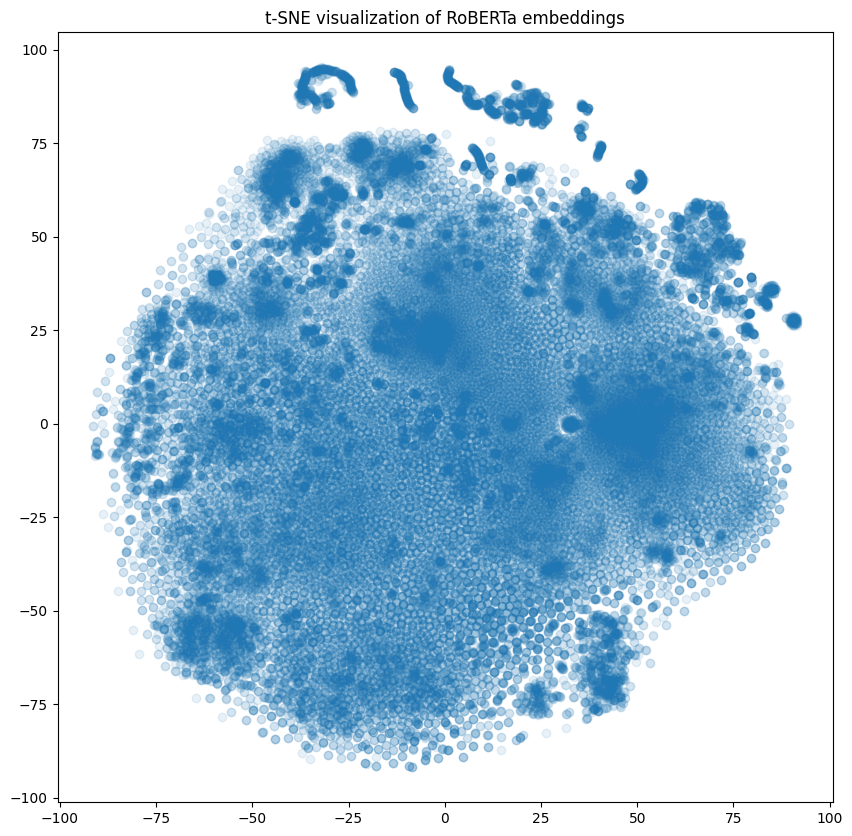

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.1)
plt.title('t-SNE visualization of RoBERTa embeddings')
plt.show()

In [ ]:
for i in range(32):
    print(i)
    print(line_text_encoding[i])


0
nothing special and , until the final act , nothing 
1
stereotypical familial quandaries 
2
for the most part , the film is deadly dull 
3
frankly , it 's pretty stupid . 
4
it 's the little nuances that perhaps had to escape from director mark romanek 's self-conscious scrutiny to happen , that finally get under your skin 
5
brazenly misguided project 
6
her real-life persona is so charmless and vacant 
7
cliches , painful improbability and murky 
8
a backseat in his own film 
9
, not as gloriously flippant as lock , stock and two smoking barrels 
10
so bad it does n't improve upon the experience of staring at a blank screen 
11
an unholy mess , 
12
cloying messages and irksome characters 
13
virtually no understanding 
14
feels especially thin stretched over the nearly 80-minute running time . 
15
be churlish to begrudge anyone for receiving whatever consolation 
16
a great movie 
17
entertaining , if somewhat standardized , action 
18
even when there are lulls , the emotions seem 

In [ ]:
from sklearn.manifold import TSNE

# TSNE_fit = TSNE(n_components=2).fit(embeddings)
reduced_embeddings = TSNE(n_components=2).fit_transform(embeddings)

In [ ]:
rate = 0.2
for i in range(12,13):
    word_embedding_real = outputs[i].detach()
    word_embedding_fake = total_augmented_data[i].detach()
    print(line_text_encoding[i])
    similarity_real = cosine_similarity(embeddings, word_embedding_real)
    similarity_fake = cosine_similarity(embeddings, word_embedding_fake*(1-rate) + word_embedding_real * rate)
    for j in range(similarity_real.shape[1]):
        print('real[',tokenizer.decode(similarity_real[:,j].argmax()) , ']' )
        print('real similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_real[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')
        print('real similar index top 5 [', end = ' ')
        for k in range(5):
            print(similarity_real[:,j].argsort()[-5:][-(k+1)], end = ' ')
        print(']')
        print('fake similar top 5 [', end = ' ')
        for k in range(5):
            print(tokenizer.decode(similarity_fake[:,j].argsort()[-5:][-(k+1)]), end = ' ')
        print(']')
        print('fake similar index top 5 [', end = ' ')
        for k in range(5):
            print(similarity_fake[:,j].argsort()[-5:][-(k+1)], end = ' ')
        print(']')
        print()
    print('\n')
# cosine_similarity(embeddings, outputs[10:15]*(1-rate) + total_augmented_data[10:15] * rate)

cloying messages and irksome characters 
real[ <s> ]
real similar top 5 [ <s> <mask> </s> .  the ]
real similar index top 5 [ 0 50264 2 4 5 ]
fake similar top 5 [ <s> ─ ;;;; ```` …………………… ]
fake similar index top 5 [ 0 49192 50012 49972 46126 ]

real[ cl ]
real similar top 5 [ cl Cl  Cl  cl CL ]
real similar index top 5 [ 3998 11428 2893 3741 7454 ]
fake similar top 5 [ 410 228 226 289 280 ]
fake similar index top 5 [ 31132 29185 29190 28390 21070 ]

real[ oy ]
real similar top 5 [ oy oys OY oya ay ]
real similar index top 5 [ 2160 15093 20664 13578 857 ]
fake similar top 5 [ oy § . ─ == ]
fake similar index top 5 [ 2160 47847 4 49192 43292 ]

real[ ing ]
real similar top 5 [ ing ed ING inging ging ]
real similar index top 5 [ 154 196 1862 19384 3923 ]
fake similar top 5 [ , ing  and  astounding  extant ]
fake similar index top 5 [ 6 154 8 29932 44772 ]

real[  messages ]
real similar top 5 [  messages  message  messaging  Messages  texts ]
real similar index top 5 [ 3731 1579 11203 34

In [ ]:
# character
rate = 0.0
rate_00 = outputs[12][9].detach()*(rate) + total_augmented_data[12][9].detach()*(1-rate)
rate = 0.2
rate_02 = outputs[12][9].detach()*(rate) + total_augmented_data[12][9].detach()*(1-rate)
rate = 0.4
rate_04 = outputs[12][9].detach()*(rate) + total_augmented_data[12][9].detach()*(1-rate)


In [ ]:
embeddings.shape

torch.Size([50265, 1024])

In [ ]:
embed = []
embed.append(embeddings)
embed.append(rate_00.reshape(1,-1))
embed.append(rate_02.reshape(1,-1))
embed.append(rate_04.reshape(1,-1))

In [ ]:
embed

[tensor([[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
         ...,
         [ 0.0393,  0.0031,  0.0465,  ..., -0.0240, -0.0505,  0.0342],
         [ 0.0499,  0.0272,  0.0413,  ..., -0.0370, -0.0100,  0.0071],
         [-0.0149, -0.0114, -0.0222,  ...,  0.0441,  0.0116, -0.0330]]),
 tensor([[ 0.0157, -0.1691, -0.0918,  ...,  0.0945,  0.1100, -0.0353]]),
 tensor([[ 0.0144, -0.1351, -0.0795,  ...,  0.0784,  0.1065, -0.0702]]),
 tensor([[ 0.0130, -0.1011, -0.0673,  ...,  0.0624,  0.1029, -0.1052]])]

In [ ]:
# specific_tokens = [" bad", " nefarious"]
# token_indices = [tokenizer.encode(token)[1] for token in specific_tokens]

# bad
# token_indices_1 = [ 1099, 5654, 6587, 39485, 11385 ]
# nefarious
# token_indices_2 = [ 33952, 39701, 43282, 34056, 28368 ]

# character
token_indices_1 = [ 3768, 2048, 44217, 37813, 32254 ]
# bad
token_indices_2 = [31937, 32254, 3768, 27056, 37813 ]

token_indices_3 = [50265,50266,50267,]

In [ ]:
token_indices_1

[3768, 2048, 44217, 37813, 32254]

In [ ]:
token_indices_2

[31937, 32254, 3768, 27056, 37813]

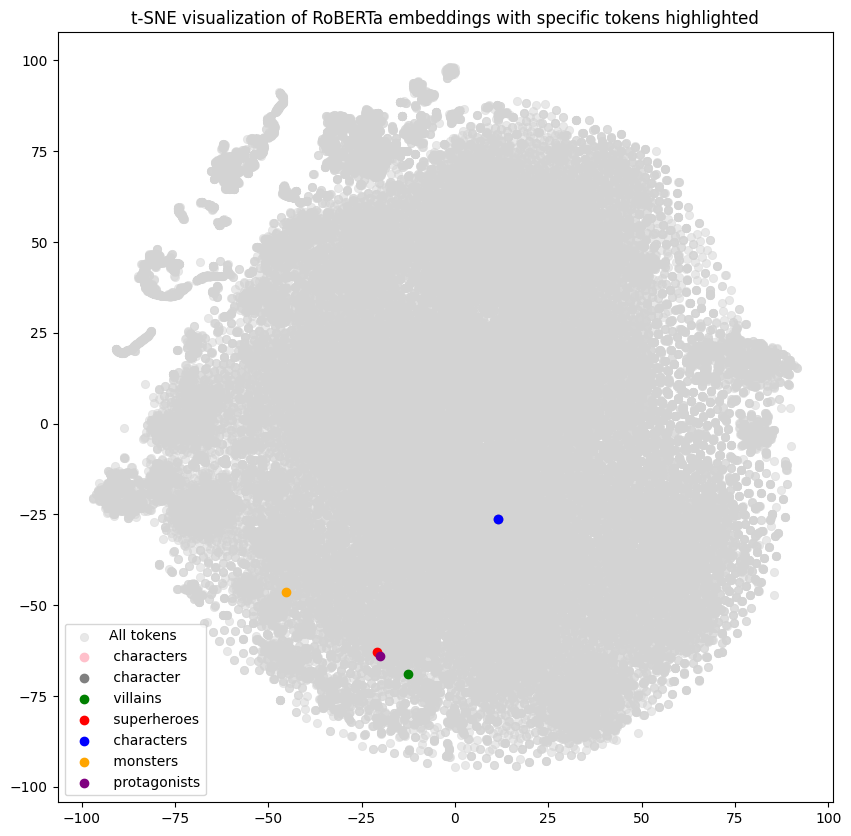

In [ ]:
import matplotlib.pyplot as plt

# Plot all embeddings in light gray

plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5, linewidths=0.5, color='lightgray', label='All tokens')

# Plot specific tokens with their respective colors
real_token_colors = ['pink', 'gray']
colors = ['green', 'red', 'blue', 'orange', 'purple']
for index, color in zip(token_indices_1[:2], real_token_colors):
    plt.scatter(reduced_embeddings[index, 0], reduced_embeddings[index, 1], alpha=1.0,   color=color, label=tokenizer.decode(index))  #
for index, color in zip(token_indices_2, colors):
    plt.scatter(reduced_embeddings[index, 0], reduced_embeddings[index, 1], alpha=1.0,  color=color, label=tokenizer.decode(index))  # 

# colors = ['black','black','black']
# for index, color in zip(token_indices_3, colors):
#     plt.scatter(reduced_embeddings[index, 0], reduced_embeddings[index, 1], alpha=0.8, color=color, label=[f'fake{index}'])

plt.legend()
plt.title('t-SNE visualization of RoBERTa embeddings with specific tokens highlighted')
plt.show()

In [326]:
get_embedding_to_token_euclidean_vq(embeddings,outputs[10:15],total_augmented_data[10:15], line_text_encoding[10:15])

goes to absurd lengths 
real[ <s> ] fake[ ```` ]

real[ go ] fake[ ```` ]

real[ es ] fake[ <mask> ]

real[  to ] fake[  the ]

real[  absurd ] fake[  the ]

real[  lengths ] fake[ <mask> ]

real[   ] fake[ <mask> ]

real[ </s> ] fake[ </s> ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]

real[ <pad> ] fake[ ```` ]



In [136]:
for i in range(5):
    word_embedding = total_augmented_data[i].detach()
    print(sentences_data[i])
    similarity = cosine_similarity(embeddings, word_embedding)
    for i in range(similarity.shape[1]):
        print(tokenizer.decode(similarity[:,i].argmax()), end = ' ')    
        # print(tokenizer.decode(similarity[:,i].argmax()), end = ' ')
    print('\n')

hide new secretions from the parental units 
 in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in 

contains no wit , only labored gags 
 in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in 

that loves its characters and communicates something rather beautiful about human nature 
 in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in 

remains utterly satisfied to remain the same throughout 
 in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in 

on the worst revenge-of-the-nerds clichés the filmmakers could dredge up 
 in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in  in 



In [138]:
word_embedding

tensor([[  20.9179, -282.2273,  118.6781,  ...,  126.8360,  -90.4233,
          160.1697],
        [  22.8258, -281.2074,  118.7337,  ...,  129.4585,  -90.8051,
          158.0662],
        [  23.5059, -280.9100,  119.7326,  ...,  126.0870,  -91.5119,
          158.1617],
        ...,
        [  20.2051, -280.8430,  117.8075,  ...,  124.6517,  -88.8068,
          158.9444],
        [  20.9919, -274.6414,  120.9024,  ...,  128.2322,  -89.1516,
          151.3676],
        [  20.9607, -282.2154,  118.0498,  ...,  126.3314,  -90.2275,
          159.8801]])

In [137]:
similarity

array([[ 0.00379766,  0.00368004,  0.00349493, ...,  0.00374482,
         0.0033736 ,  0.00380875],
       [-0.02129523, -0.02142335, -0.02172077, ..., -0.02140336,
        -0.02177148, -0.02126618],
       [-0.01390019, -0.01393088, -0.01402959, ..., -0.01405553,
        -0.01495539, -0.01388545],
       ...,
       [-0.00218302, -0.00220223, -0.00255153, ..., -0.00250377,
        -0.00250476, -0.00227114],
       [-0.00326503, -0.00289528, -0.00341081, ..., -0.00375614,
        -0.00336625, -0.0032506 ],
       [-0.01848722, -0.01840778, -0.01891378, ..., -0.01885967,
        -0.01933162, -0.01846707]], dtype=float32)

In [123]:
model = model.to(device = 'cuda:0')

In [173]:
vq_input__ = torch.stack(vq_input_, dim=0)
vq_input__.shape


torch.Size([2, 13, 1024])

In [170]:
vq_input_

[tensor([[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [-0.2047, -0.0161, -0.2656,  ...,  0.0354, -0.0816,  0.0464],
         [-0.1115, -0.0641, -0.1033,  ...,  0.0108,  0.1166, -0.2107],
         ...,
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156]]),
 tensor([[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [ 0.0876, -0.2107, -0.0619,  ...,  0.0346, -0.0101, -0.2472],
         [-0.1479, -0.0861, -0.2339,  ...,  0.0241,  0.0740,  0.1552],
         ...,
         [-0.2632, -0.0624, -0.0471,  ...,  0.0992,  0.1281, -0.0728],
         [-0.0217,  0.2372,  0.1218,  ..., -0.0779, -0.1398,  0.2028],
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356]])]

In [175]:
vq_input__ = vq_input__.to(device = 'cuda:0')

In [ ]:
vq_input__

In [176]:
for j in range(model.lm_head(vq_input__).shape[0]):
    for i in range(model.lm_head(vq_input__).shape[1]):
        predicted_index = torch.argmax(model.lm_head(vq_input__)[j,i,:]).item()
        print(torch.argmax(model.lm_head(vq_input__)[j,i,:]).item())
        predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
        print(f"Predicted token: {predicted_token}")
    print()

20485
Predicted token: NB
7387
Predicted token: aki
19569
Predicted token: ALS
16523
Predicted token: FM
9736
Predicted token: cel
19363
Predicted token: Ġoutdated
26369
Predicted token: WH
11124
Predicted token: hal
1250
Predicted token: all
20485
Predicted token: NB
20485
Predicted token: NB
39368
Predicted token: ĠMirage
39368
Predicted token: ĠMirage

20485
Predicted token: NB
2028
Predicted token: ind
4123
Predicted token: ures
9036
Predicted token: ĠDA
5857
Predicted token: ĠNation
15722
Predicted token: ķ
14461
Predicted token: Ġnavigation
17019
Predicted token: ĠPrairie
3006
Predicted token: iss
6997
Predicted token: TR
1073
Predicted token: ag
20485
Predicted token: NB
20485
Predicted token: NB



In [191]:
vq_input__

tensor([[[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [-0.2047, -0.0161, -0.2656,  ...,  0.0354, -0.0816,  0.0464],
         [-0.1115, -0.0641, -0.1033,  ...,  0.0108,  0.1166, -0.2107],
         ...,
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156]],

        [[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [ 0.0876, -0.2107, -0.0619,  ...,  0.0346, -0.0101, -0.2472],
         [-0.1479, -0.0861, -0.2339,  ...,  0.0241,  0.0740,  0.1552],
         ...,
         [-0.2632, -0.0624, -0.0471,  ...,  0.0992,  0.1281, -0.0728],
         [-0.0217,  0.2372,  0.1218,  ..., -0.0779, -0.1398,  0.2028],
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356]]],
       device='cuda:0')

In [197]:
vq_input__ = vq_input__.to(device = 'cpu')
total_augmented_data = total_augmented_data.to(device = 'cpu')

In [199]:
vq_input__

tensor([[[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [-0.2047, -0.0161, -0.2656,  ...,  0.0354, -0.0816,  0.0464],
         [-0.1115, -0.0641, -0.1033,  ...,  0.0108,  0.1166, -0.2107],
         ...,
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0231,  0.0156]],

        [[-0.1406, -0.0096,  0.0391,  ...,  0.0508, -0.0059, -0.0360],
         [ 0.0876, -0.2107, -0.0619,  ...,  0.0346, -0.0101, -0.2472],
         [-0.1479, -0.0861, -0.2339,  ...,  0.0241,  0.0740,  0.1552],
         ...,
         [-0.2632, -0.0624, -0.0471,  ...,  0.0992,  0.1281, -0.0728],
         [-0.0217,  0.2372,  0.1218,  ..., -0.0779, -0.1398,  0.2028],
         [-0.0828, -0.0007, -0.1174,  ...,  0.1086,  0.0696, -0.0356]]])

In [213]:
vq_input__[0][0].shape

torch.Size([1024])

In [205]:
total_augmented_data[0].shape

torch.Size([13, 1024])

In [215]:
for i in range(13):
    print(cosine_similarity(vq_input__[0][i].detach().numpy(), total_augmented_data[0][i].detach().numpy().T))

0.003797658
-0.02158549
-0.013862468
-0.01153744
-0.03962185
-0.037309144
-0.022653874
-0.054282565
-0.056920398
-0.003366254
-0.018467074
0.17039949
0.17039949


In [216]:
for i in range(13):
    print(cosine_similarity(vq_input__[1][i].detach().numpy(), total_augmented_data[1][i].detach().numpy().T))

0.003797658
0.01999777
-0.007316079
-0.054570563
-0.10847142
-0.010749772
-0.021701772
-0.068836235
-0.009753025
-0.0060856505
-0.025620691
-0.003366254
-0.018467074


In [190]:
total_augmented_data

tensor([[[  20.9179, -282.2273,  118.6781,  ...,  126.8360,  -90.4233,
           160.1697],
         [  22.5677, -282.0784,  120.0120,  ...,  125.6524,  -88.9789,
           159.9776],
         [  20.8950, -282.3316,  118.0566,  ...,  126.3345,  -90.3176,
           160.0466],
         ...,
         [  20.9607, -282.2154,  118.0498,  ...,  126.3314,  -90.2275,
           159.8801],
         [  21.1212, -282.0103,  117.8725,  ...,  126.2891,  -90.3391,
           159.7347],
         [  21.1212, -282.0103,  117.8725,  ...,  126.2891,  -90.3391,
           159.7347]],

        [[  20.9179, -282.2273,  118.6781,  ...,  126.8360,  -90.4233,
           160.1697],
         [  18.8131, -277.4051,  124.7166,  ...,  132.6433,  -89.6853,
           161.3276],
         [  20.9607, -282.2154,  118.0498,  ...,  126.3314,  -90.2275,
           159.8801],
         ...,
         [  20.4835, -282.2095,  118.4985,  ...,  126.5946,  -90.5147,
           160.4159],
         [  20.9919, -274.6414,  120.902

In [143]:
for j in range(model.lm_head(total_augmented_data).shape[0]):
    for i in range(model.lm_head(total_augmented_data).shape[1]):
        predicted_index = torch.argmax(model.lm_head(total_augmented_data)[j,i,:]).item()
        print(torch.argmax(model.lm_head(total_augmented_data)[j,i,:]).item())
        predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]

        print(f"Predicted token: {predicted_token}")
    print()

37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively

37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively
37883
Predicted token: Ġobjectively



In [128]:
# Get the predicted token
model.lm_head()

predicted_index = torch.argmax(model.lm_head(total_augmented_data)[0,:,:]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]

print(f"Predicted token: {predicted_token}")

Predicted token: None


In [111]:
torch.argmax(predictions[0, 6]).item()

3267

In [114]:
predictions.shape

torch.Size([1, 9, 50265])

In [44]:
tokenizer.convert_ids_to_tokens([predicted_index])

['Ġbed']

In [32]:
predictions.shape

torch.Size([1, 9, 50265])

In [42]:
predictions[0,6].shape

torch.Size([50265])

In [43]:
predictions[0,6]

tensor([43.1920, -4.2806, 49.4451,  ...,  0.2396,  2.6224, 29.8632])

In [30]:
inputs['input_ids'][0]

tensor([    0,   133,  4758,  4005,    15,     5, 50264,     4,     2])

In [25]:
outputs.logits.shape

torch.Size([1, 9, 50265])

In [18]:
outputs.logits.shape

torch.Size([1, 12, 50265])

In [21]:
inputs

{'input_ids': tensor([[    0, 31414,     6,   141,    32,   646, 32804,   530,   742,   452,
           116,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [20]:
inputs["input_ids"][0]

tensor([    0, 31414,     6,   141,    32,   646, 32804,   530,   742,   452,
          116,     2])

In [19]:
tokenizer.mask_token_id

50264

In [14]:
tokenizer.token

'<mask>'

In [9]:
inputs['input_ids']

tensor([[    0, 31414,     6,   141,    32,   646, 32804,   530,   742,   452,
           116,     2]])

In [4]:
predictions.shape

torch.Size([1, 12, 50265])

In [6]:
# # 모델 불러오기

# from transformers import RobertaTokenizer, RobertaForSequenceClassification
# import torch

# # Load tokenizer and model
# tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
# model = RobertaForSequenceClassification.from_pretrained('roberta-large')

In [7]:
# # 모델 저장

# import pickle

# with open( 'model_file/roberta_large.pkl', 'wb') as f:
#     pickle.dump(model, f)
# with open( 'model_file/roberta_large_tokenizer.pkl', 'wb') as f:
#     pickle.dump(tokenizer, f)

In [39]:
# from datasets import load_dataset
# import pickle

# text_dataset = {}

# for data in ['sst2', 'cola', 'mrpc', 'qqp', 'stsb', 'mnli', 'qnli', 'rte', 'wnli', 'ax']:
#     dataset = load_dataset("glue", data)
#     text_dataset[data] = dataset
    
    
#     with open('dataset/%s_dataset.pkl'%data, 'wb') as f:
#         pickle.dump(dataset, f)


In [1]:
import numpy as np
import os
os.getcwd()

'/workspace/VQ_Augmentation'

In [2]:
model_file_path = os.getcwd() + '/model_file'


In [3]:
import pickle
with open(model_file_path + '/roberta-large_class_2.pkl', "rb") as f:
    model = pickle.load(f).to(device = 'cuda:1')
with open(model_file_path + '/roberta-large_tokenizer.pkl', "rb") as f:
    tokenizer = pickle.load(f)
    

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
import os
import pickle
dataset_names =  ['sst2', 'cola', 'mrpc', 'qqp', 'stsb', 'mnli', 'qnli', 'rte', 'wnli', 'ax']
dataset = {}
for dataset_name in dataset_names:
    data_file_path = '%s/dataset/%s_dataset.pkl'%(os.getcwd(), dataset_name)
    with open(data_file_path, "rb") as f:
        temp_data = pickle.load(f)
        dataset[dataset_name] = temp_data

In [5]:
mrpc = dataset['mrpc']
qqp = dataset['qqp']

In [9]:
qqp['test']['question1']

['Would the idea of Trump and Putin in bed together scare you, given the geopolitical implications?',
 'What are the top ten Consumer-to-Consumer E-commerce online?',
 "Why don't people simply 'Google' instead of asking questions on Quora?",
 'Is it safe to invest in social trade biz?',
 'If the universe is expanding then does matter also expand?',
 'What is the plural of hypothesis?',
 'What is the application form you need for launching a company?',
 'What is Big Theta? When should I use Big Theta as opposed to big O?',
 'What are the health implications of accidentally eating a small quantity of aluminium foil?',
 'Where is the best whirlpool service center Hyderabad?',
 'Kollywood:Why do actor Vijay fans(not all ,but many) hate actor Surya?',
 'How can you secure your computer privacy?',
 'What are the best projects for beginners in Android app development?',
 'What is a security?',
 'Which Star Wars lightsaber is your favorite?',
 'What happens when aluminium reacts with concentra

In [24]:
from torch.utils.data import Dataset
import torch
from random import randint

def sum_text(texts1, texts2, self):
    full_text = np.array(texts1,dtype=object) + np.array([self.tokenizer.sep_token for _ in range(len(texts1))])+np.array(texts2,dtype=object)

    return list(full_text)


class _Make_pair(Dataset):
    def __init__(self, args, encodings, labels):
        self.args = args
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, index):
        # get the encoded input data for the given index
        if self.args.data_loader_type == 'few-shot':
            encoding = {key: tensor[index] for key, tensor in self.encodings.items()}

        # get the corresponding label for the given index
        label = torch.tensor(self.labels[index])

        return encoding, label
    
    def __len__(self):
        return len(self.labels)

In [50]:
dataset[dataset_names[5]]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9847
    })
})

In [18]:
train_eval = 'train'
dataset = mrpc[train_eval]
dataset.num_rows
num_classes = len(set(dataset['label']))
num_classes
num_shots = 16

2

In [28]:
dataset[dataset.num_rows-1]

{'sentence1': "The 30-year bond US30YT = RR rose 22 / 32 for a yield of 4.31 percent , versus 4.35 percent at Wednesday 's close .",
 'sentence2': 'The 30-year bond US30YT = RR grew 1-3 / 32 for a yield of 4.30 percent , down from 4.35 percent late Wednesday .',
 'label': 0,
 'idx': 4075}

In [32]:
dataset[value]

{'sentence1': '" Any decision on Charleroi will have huge implications for regional airports in France , " he said .',
 'sentence2': '" A bad decision on Charleroi would have huge implications for state-owned regional airports in France .',
 'label': 1,
 'idx': 1857}

In [33]:
classes = set(dataset['label'])
# dataset[train_eval].num_rows

break_point = 0
tensor_index = {}
for class_ in classes:
    tensor_index[class_] = []
while True:
    value = randint(0, dataset.num_rows - 1)
    for class_ in classes:
        if dataset[value]['label'] == class_:
            if value not in tensor_index[class_]:
                if len(tensor_index[class_]) < num_shots:
                    tensor_index[class_].append(value)
                    break_point += 1
                else:
                    pass
    if break_point == num_classes * num_shots:
        break
    else:
        pass

tensor_index_total = []
for i in classes:
    tensor_index_total += tensor_index[i]


In [35]:
len(tensor_index_total)

32

In [22]:
for i in set(dataset['label']):
    print(i)

0
1


In [17]:
dataset.num_rows

3668

In [13]:
len(set( mrpc[train_eval]['label']))

2

In [12]:
aa = np.array(mrpc['train']['sentence1'],dtype=object) + np.array([tokenizer.sep_token for _ in range(len(mrpc['train']['sentence1']))])+np.array(mrpc['train']['sentence2'],dtype=object)


linetext = list(aa)

In [16]:
type(linetext)

list

In [17]:
tokenizer(linetext, 
        add_special_tokens=True, 
        padding= 'max_length',  # 'max_length'
        max_length= 128,  # args.max_seq_length
        truncation=True,
        return_attention_mask=True, 
        return_tensors='pt') 

{'input_ids': tensor([[    0, 10127,  1001,  ...,     1,     1,     1],
        [    0,   975, 26802,  ...,     1,     1,     1],
        [    0,  1213,    56,  ...,     1,     1,     1],
        ...,
        [    0,   113,   166,  ...,     1,     1,     1],
        [    0,   133, 12059,  ...,     1,     1,     1],
        [    0,   133,   389,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [19]:
mrpc['train'][0]['sentence1']

'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .'

In [20]:
mrpc['train'][0]['sentence2']

'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .'

In [27]:
a = ['1','2','3']
b = ['4','5','6']

[x[0] + x[1] for x in zip(a, b)]

['14', '25', '36']

In [17]:
from operator import add
map(add , mrpc['train']['sentence1'], mrpc['train']['sentence2'])

In [9]:
tokenizer.sep_token_id

2

In [11]:
tokenizer.encode(full_sentence, add_special_tokens=False,)

[0,
 10127,
 1001,
 6182,
 1238,
 39,
 2138,
 2156,
 2661,
 37,
 373,
 22,
 5,
 4562,
 22,
 2156,
 9,
 12507,
 7018,
 23817,
 39,
 1283,
 479,
 2,
 48310,
 4506,
 7,
 123,
 25,
 129,
 22,
 5,
 4562,
 22,
 2156,
 1918,
 1001,
 6182,
 1238,
 39,
 2138,
 9,
 12507,
 7018,
 23817,
 39,
 1283,
 479,
 2]

In [39]:
dataset_names

['sst2', 'cola', 'mrpc', 'qqp', 'stsb', 'mnli', 'qnli', 'rte', 'wnli', 'ax']

In [62]:
input_ids = [tokenizer.cls_token_id]
attention_mask = [1]
token_type_dis = [0]
for sent_id, input_text in enumerate()


'</s>'

In [97]:
# import logging
# import pandas as pd

# logger = logging.getLogger(__name__)


# def input_example_to_tuple(example): 
#     if example['sentence2'] is None:
#         return [example[sentence1]]
#     else:
#         return [example[sentence1], example['sentence2']]



In [95]:
mrpc['train']['sentence2'] is None

False

In [90]:
input_example_to_tuple(mrpc['train'])

KeyError: 'Column Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence . not in the dataset. Current columns in the dataset: [\'sentence1\', \'sentence2\', \'label\', \'idx\']'

In [73]:
list(zip(mrpc['train']['sentence1'], [tokenizer.sep_token for _ in range(len(mrpc['train']['sentence1']))], mrpc['train']['sentence2']))

[('Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
  '</s>',
  'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .'),
 ("Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion .",
  '</s>',
  "Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 ."),
 ('They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added .',
  '</s>',
  "On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale ."),
 ('Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
  '</s>',
  'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .'),
 ('The stock rose $ 2.11 , or about 11 percent , to close Friday at $ 21.51 on th

In [ ]:
*cls**sent_0**mask*,*+sentl_1**sep+*

In [12]:
tokenizer.sep_token

'</s>'

In [10]:
tokenizer.all_special_ids

[0, 2, 3, 1, 50264]

In [9]:
encoding = tokenizer(sst2['train'][0]['sentence'], 
                        add_special_tokens=True, 
                        padding= 'max_length',  # 'max_length'
                        max_length= 128,  # args.max_seq_length
                        truncation=True,
                        return_attention_mask=True, 
                        return_tensors='pt')  # 왜인지 encoded_plus를 쓰면 버그뜸...
# args.max_seq_length = encoding['input_ids'].shape[1]
print(encoding)

{'input_ids': tensor([[    0, 37265,    92,  3556,  2485,    31,     5, 20536,  2833,  1437,
             2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,  

In [23]:
# for i in range(8,10):
i = 9
print(i)
print(dataset_names[i])
print(dataset[dataset_names[i]])

9
ax
DatasetDict({
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 1104
    })
})


In [38]:
print(dataset_names[2])
print(dataset[dataset_names[2]])

mrpc
DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


In [36]:
num = 2
for i in range(100):
    print(dataset[dataset_names[num]]['train'][i]['sentence1'],dataset[dataset_names[num]]['train'][i]['sentence2'])
    print(dataset[dataset_names[num]]['train'][i]['label'])

Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence . Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .
1
Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion . Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 .
0
They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added . On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale .
1
Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 . Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .
0
The stock rose $ 2.11 , or about 11 percent , to close Friday at $ 21.51 on the New York Stock Exchange . PG & E Corp. shares jumped $ 1.63 or 8 percent to $

In [35]:
num = 2
for i in range(100):
    print(dataset[dataset_names[num]]['train'][i]['sentence2'],dataset[dataset_names[num]]['train'][i]['label'] )

Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence . 1
Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 . 0
On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale . 1
Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 . 0
PG & E Corp. shares jumped $ 1.63 or 8 percent to $ 21.03 on the New York Stock Exchange on Friday . 1
With the scandal hanging over Stewart 's company , revenue the first quarter of the year dropped 15 percent from the same period a year earlier . 1
The tech-laced Nasdaq Composite .IXIC rallied 30.46 points , or 2.04 percent , to 1,520.15 . 0
The DVD CCA appealed that decision to the U.S. Supreme Court . 1
Earnings were affected by a non-recurring $ 8 million tax benefit in the year-ago period . 0
Shares of Xoma fell 16 percent in early trade , while shares of Genentech

In [16]:
dataset[dataset_names[9]]

DatasetDict({
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 1104
    })
})

In [14]:
import os
os.getcwd()

'/workspace/VQ_Augmentation'

In [33]:
model_name = 'roberta_large'
dataset = 'colaaaaa'
vq_lr = 0.0001
num_codebook_vectors = 512
seed = 42

if not os.path.exists(f'{os.getcwd()}/testset_acc/{model_name}_{dataset}_acc.txt'):
    with open(f'{os.getcwd()}/testset_acc/{model_name}_{dataset}_acc.txt', 'w') as f:
        f.close()

with open(f'{os.getcwd()}/testset_acc/{model_name}_{dataset}_acc.txt', 'a') as f:
    f.write('vq_lr : %s, num_codebook_vectors : %s seed : %s'%(vq_lr, num_codebook_vectors, seed))
    f.write('\n')
    f.write('acc : %s'%(0.5))
    f.write('\n')

seed = 12

with open(f'{os.getcwd()}/testset_acc/{model_name}_{dataset}_acc.txt', 'a') as f:
    f.write('vq_lr : %s, num_codebook_vectors : %s seed : %s'%(vq_lr, num_codebook_vectors, seed))
    f.write('\n')
    f.write('acc : %s'%(0.5))
    f.write('\n')


In [28]:
model_name = 'roberta_large'
dataset = 'cola'
vq_lr = 0.0001
num_codebook_vectors = 512
seed = 12
with open(f'{os.getcwd()}/testset_acc/{model_name}_{dataset}_acc.txt', 'a') as f:
    f.write('vq_lr : %s, num_codebook_vectors : %s seed : %s'%(vq_lr, num_codebook_vectors, seed))
    f.write('\n')
    f.write('acc : %s'%(0.5))
    f.close()